<a href="https://colab.research.google.com/github/p15avgo/colab/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Activation, Dropout, Flatten, Dense
from keras import backend as K 
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import backend


In [ ]:
backend.set_image_data_format('channels_last')

In [ ]:
classifier = tf.keras.Sequential()

In [ ]:
model = tf.keras.Sequential()

In [ ]:

model.add(layers.Conv2D(64, (3, 3), activation='elu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='elu'))
model.add(layers.Dense(units=64, activation='elu'))
model.add(layers.Dense(units=34,activation='sigmoid'))


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)       

In [ ]:
data_root_train = ('/content/drive/My Drive/release_v0/images/train_data')
data_root_valid = ('/content/drive/My Drive/release_v0/images/valid_data')


In [ ]:
batch_size = 32
IMAGE_SHAPE = 64,64

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.3 , rescale=1/255)
image_data_train = image_generator.flow_from_directory(str(data_root_train),target_size=IMAGE_SHAPE)
image_data_valid = image_generator.flow_from_directory(str(data_root_valid),target_size=IMAGE_SHAPE)

Found 2013 images belonging to 34 classes.
Found 2013 images belonging to 34 classes.


In [ ]:
train_image_generator = image_generator.flow_from_directory(str(data_root_train),subset='training',target_size=IMAGE_SHAPE)#ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = image_generator.flow_from_directory(str(data_root_valid),subset='validation',target_size=IMAGE_SHAPE)#ImageDataGenerator(rescale=1./255) # Generator for our validation data

Found 2013 images belonging to 34 classes.
Found 2013 images belonging to 34 classes.


In [ ]:
for image_batch, label_batch in image_data_train:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 64, 64, 3)
Label batch shape:  (32, 34)


In [ ]:
predictions = model(image_batch)

predictions.shape

TensorShape([32, 34])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'),
              metrics=['accuracy'])

In [ ]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics()

In [ ]:
steps_per_epoch=np.ceil(image_data_train.n/batch_size)
batch_stats_callback = CollectBatchStats() 
history = model.fit_generator(image_data_train, epochs=60,callbacks = [batch_stats_callback],verbose=2)

Epoch 1/60
63/63 - 14s - loss: 3.3783 - accuracy: 0.0625
Epoch 2/60
63/63 - 14s - loss: 3.4017 - accuracy: 0.0312
Epoch 3/60
63/63 - 14s - loss: 3.3741 - accuracy: 0.0312
Epoch 4/60
63/63 - 13s - loss: 3.4825 - accuracy: 0.0625
Epoch 5/60
63/63 - 13s - loss: 3.6166 - accuracy: 0.0000e+00
Epoch 6/60
63/63 - 13s - loss: 3.3371 - accuracy: 0.0312
Epoch 7/60
63/63 - 13s - loss: 3.3798 - accuracy: 0.0938
Epoch 8/60
63/63 - 14s - loss: 3.3431 - accuracy: 0.1875
Epoch 9/60
63/63 - 14s - loss: 3.3054 - accuracy: 0.0938
Epoch 10/60
63/63 - 13s - loss: 2.9172 - accuracy: 0.1562
Epoch 11/60
63/63 - 13s - loss: 3.1354 - accuracy: 0.0000e+00
Epoch 12/60
63/63 - 13s - loss: 2.9996 - accuracy: 0.1562
Epoch 13/60
63/63 - 13s - loss: 2.7986 - accuracy: 0.1250
Epoch 14/60
63/63 - 13s - loss: 2.8647 - accuracy: 0.0938
Epoch 15/60
63/63 - 13s - loss: 2.6044 - accuracy: 0.1250
Epoch 16/60
63/63 - 13s - loss: 2.2850 - accuracy: 0.2188
Epoch 17/60
63/63 - 13s - loss: 2.2780 - accuracy: 0.3125
Epoch 18/60
63/

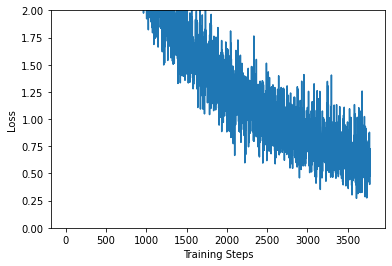

In [ ]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

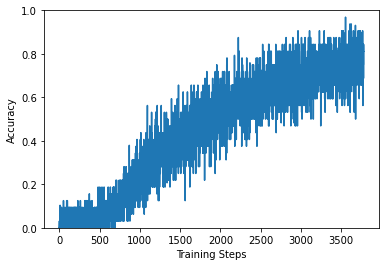

In [ ]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

In [ ]:
class_names = sorted(image_data_train.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['A1L', 'A2L', 'A3L', 'Adl', 'Ael', 'Fal', 'Fbl', 'Fcl', 'Fdl',
       'Fel', 'Ffl', 'Fgl', 'Fhl', 'Fil', 'Fll', 'Fml', 'Gal', 'Gbl',
       'Gcl', 'Gdl', 'Ggl', 'Gzl', 'Nal', 'Nbl', 'Ncl', 'Ndl', 'Nel',
       'Nfl', 'Ngl', 'Nhl', 'Nil', 'Nll', 'Nml', 'New'], dtype='<U3')

In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [ ]:
label_id = np.argmax(label_batch, axis=-1)

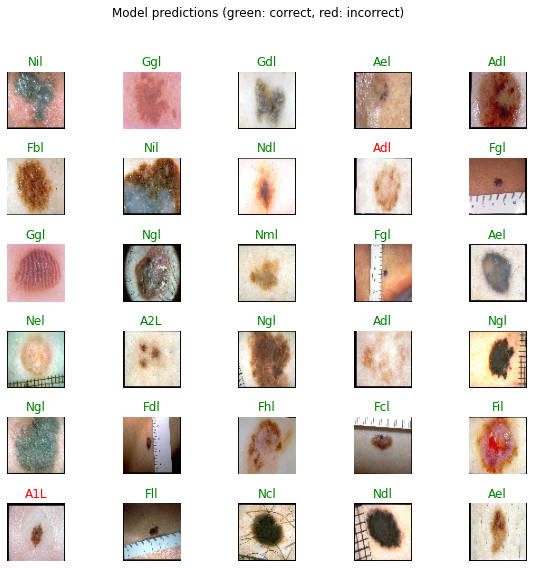

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")